In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format



In [2]:
# coverting link to cs to a df for red wine
red_df = pd.read_csv('https://query.data.world/s/frjhfwok6awc6pkoetcyiyajdilglv?dws=00000')

In [3]:
# converting link to csv to a df for white wine
white_df = pd.read_csv('https://query.data.world/s/pxb3oenf46echvzdpylyh6d6udmgw4?dws=00000')

In [4]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5


In [5]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6


In [6]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
white_df.quality.describe()

count               4,898.00
mean                    5.88
std                     0.89
min                     3.00
25%                     5.00
50%                     6.00
75%                     6.00
max                     9.00
Name: quality, dtype: float64

In [9]:
red_df.quality.describe()

count               1,599.00
mean                    5.64
std                     0.81
min                     3.00
25%                     5.00
50%                     6.00
75%                     6.00
max                     8.00
Name: quality, dtype: float64

In [10]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5


In [11]:
# Create a new index column
red_df['wine_id'] = 'red'


In [12]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_id
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,red
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,red
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,red
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,red
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,red


In [13]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  wine_id               1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [14]:
# Create a new index column
white_df['wine_id'] = 'white'


In [15]:
white_df.shape

(4898, 13)

In [16]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  wine_id               4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [17]:
red_df.shape

(1599, 13)

In [18]:
df = pd.concat([white_df,red_df],axis = 0)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_id               6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_id
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6,white
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6,white
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6,white
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,white
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,white


In [21]:
df.columns = df.columns.str.replace(' ', '_')

In [22]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_id
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6,white
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6,white
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6,white
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,white
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.20,0.60,0.08,2.00,0.09,32.00,44.00,0.99,3.45,0.58,10.50,5,red
1595,5.90,0.55,0.10,2.20,0.06,39.00,51.00,1.00,3.52,0.76,11.20,6,red
1596,6.30,0.51,0.13,2.30,0.08,29.00,40.00,1.00,3.42,0.75,11.00,6,red
1597,5.90,0.65,0.12,2.00,0.07,32.00,44.00,1.00,3.57,0.71,10.20,5,red


In [23]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [24]:
# using boolean indexing
rows = df[df['quality'] == 7]


In [25]:
rows.chlorides.describe()

count               1,079.00
mean                    0.05
std                     0.02
min                     0.01
25%                     0.03
50%                     0.04
75%                     0.05
max                     0.36
Name: chlorides, dtype: float64

## chlorides could be something common for a all wines in df


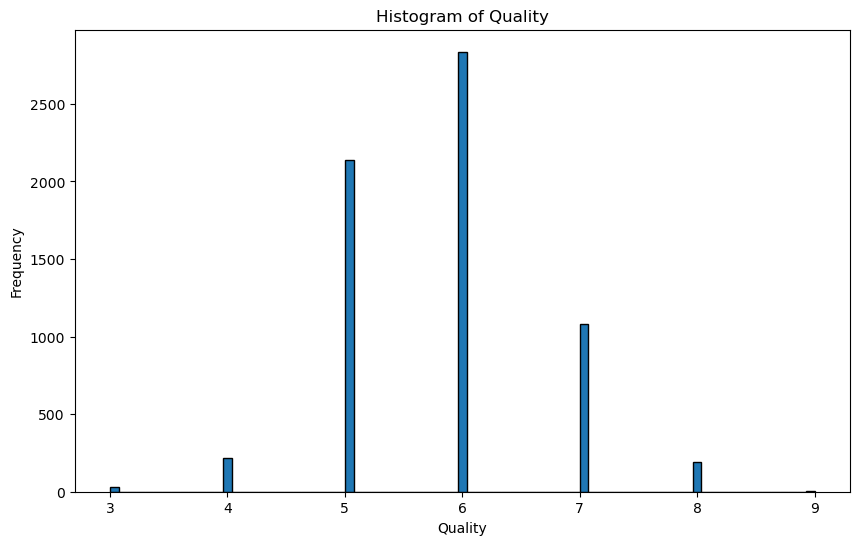

In [26]:
plt.figure(figsize=(10,6))
plt.hist(df['quality'], bins=81, edgecolor='black')
plt.title('Histogram of Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

In [27]:
def label_type(row):
    if 1 <= row['quality'] <= 4:
        return 'low'
    elif 5 <= row['quality'] <= 7:
        return 'average'
    elif 8 <= row['quality'] <= 10:
        return 'high'

df['type'] = df.apply(label_type, axis=1)

In [28]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_id,type
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6,white,average
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6,white,average
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6,white,average
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,white,average
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,white,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.20,0.60,0.08,2.00,0.09,32.00,44.00,0.99,3.45,0.58,10.50,5,red,average
1595,5.90,0.55,0.10,2.20,0.06,39.00,51.00,1.00,3.52,0.76,11.20,6,red,average
1596,6.30,0.51,0.13,2.30,0.08,29.00,40.00,1.00,3.42,0.75,11.00,6,red,average
1597,5.90,0.65,0.12,2.00,0.07,32.00,44.00,1.00,3.57,0.71,10.20,5,red,average


In [29]:
 def check_columns(df, reports=False, graphs=False):
    """
    This function takes a pandas dataframe as input and returns
    a dataframe with information about each column in the dataframe. For
    each column, it returns the column name, the number of
    unique values in the column, the unique values themselves,
    the number of null values in the column, the proportion of null values,
    the data type of the column, and the range of the column if it is float or int. The resulting dataframe is sorted by the
    'Number of Unique Values' column in ascending order.
    """
    print(f"Total rows: {df.shape[0]}")
    print(f"Total columns: {df.shape[1]}")
    if reports == True:
        describe = df.describe().round(2)
        pd.DataFrame(describe)
        print(describe)
    if graphs == True:
        df.hist(bins=20, figsize=(10, 10))
        plt.show()
    data = []
    # Loop through each column in the dataframe
    for column in df.columns:
        # Append the column name, number of unique values, unique values, number of null values, proportion of null values, and data type to the data list
        if df[column].dtype in ["float64", "int64"]:
            data.append(
                [
                    column,
                    df[column].dtype,
                    df[column].nunique(),
                    df[column].isna().sum(),
                    df[column].isna().mean().round(5),
                    df[column].unique(),
                    df[column].describe()[["min", "max", "mean"]].values,
                ]
            )
        else:
            data.append(
                [
                    column,
                    df[column].dtype,
                    df[column].nunique(),
                    df[column].isna().sum(),
                    df[column].isna().mean().round(5),
                    df[column].unique(),
                    None,
                ]
            )
    # Create a pandas dataframe from the data list, with column names 'Column Name', 'Number of Unique Values', 'Unique Values', 'Number of Null Values', 'Proportion of Null Values', 'dtype', and 'Range' (if column is float or int)
    # Sort the resulting dataframe by the 'Number of Unique Values' column in ascending order
    return pd.DataFrame(
        data,
        columns=[
            "col_name",
            "dtype",
            "num_unique",
            "num_null",
            "pct_null",
            "unique_values",
            "range (min, max, mean)",
        ],
    )

In [30]:
check_columns(df)

Total rows: 6497
Total columns: 14


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,fixed_acidity,float64,106,0,0.00,"[7.0, 6.3, 8.1, 7.2, 6.2, 8.6, 7.9, 6.6, 8.3, ...","[3.8, 15.9, 7.215307064799138]"
1,volatile_acidity,float64,187,0,0.00,"[0.27, 0.3, 0.28, 0.23, 0.32, 0.22, 0.18, 0.16...","[0.08, 1.58, 0.33966599969216565]"
2,citric_acid,float64,89,0,0.00,"[0.36, 0.34, 0.4, 0.32, 0.16, 0.43, 0.41, 0.37...","[0.0, 1.66, 0.3186332153301524]"
3,residual_sugar,float64,316,0,0.00,"[20.7, 1.6, 6.9, 8.5, 7.0, 1.5, 1.45, 4.2, 1.2...","[0.6, 65.8, 5.443235339387409]"
4,chlorides,float64,214,0,0.00,"[0.045, 0.049, 0.05, 0.058, 0.044, 0.033, 0.03...","[0.009, 0.611, 0.05603386178236109]"
5,free_sulfur_dioxide,float64,135,0,0.00,"[45.0, 14.0, 30.0, 47.0, 28.0, 11.0, 17.0, 16....","[1.0, 289.0, 30.525319378174544]"
6,total_sulfur_dioxide,float64,276,0,0.00,"[170.0, 132.0, 97.0, 186.0, 136.0, 129.0, 63.0...","[6.0, 440.0, 115.7445744189626]"
7,density,float64,998,0,0.00,"[1.001, 0.994, 0.9951, 0.9956, 0.9949, 0.9938,...","[0.98711, 1.03898, 0.9946966338309989]"
8,pH,float64,108,0,0.00,"[3.0, 3.3, 3.26, 3.19, 3.18, 3.22, 2.99, 3.14,...","[2.72, 4.01, 3.2185008465445586]"
9,sulphates,float64,111,0,0.00,"[0.45, 0.49, 0.44, 0.4, 0.47, 0.56, 0.53, 0.63...","[0.22, 2.0, 0.5312682776666153]"


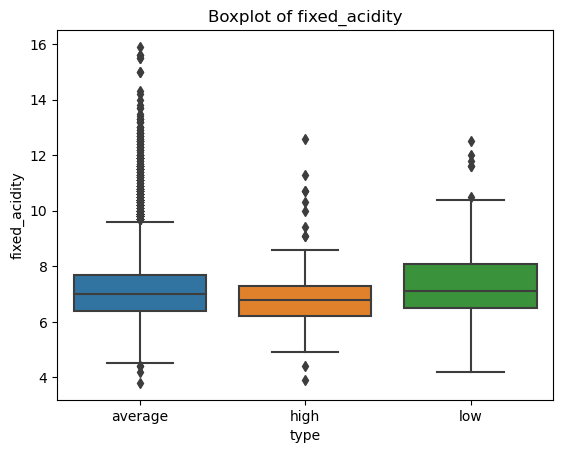

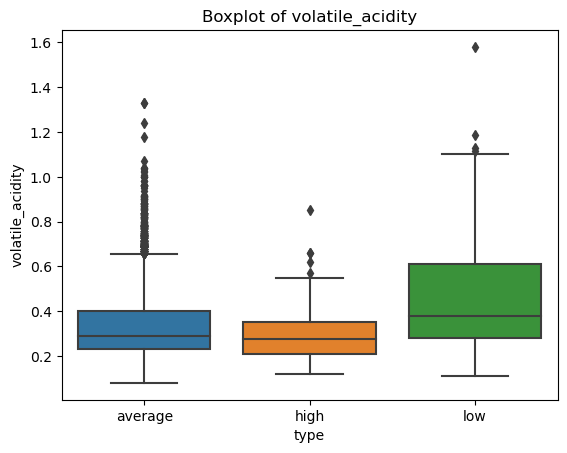

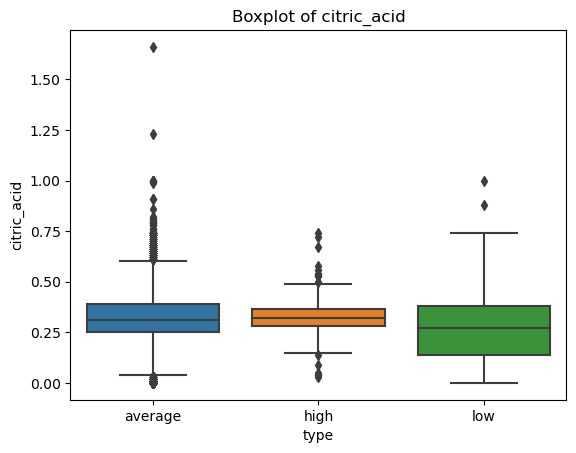

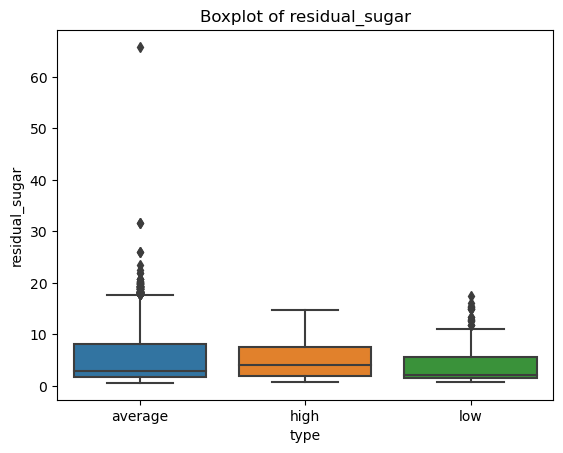

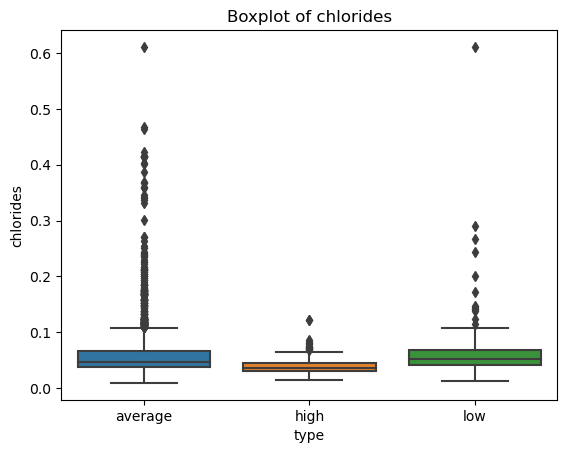

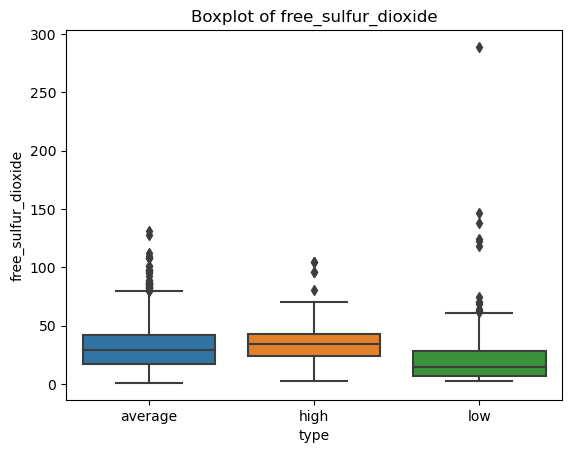

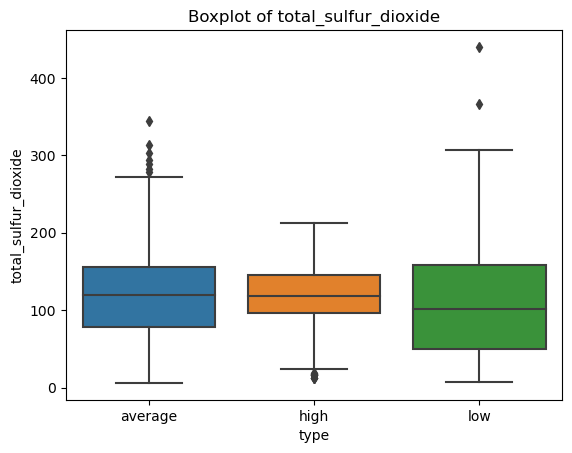

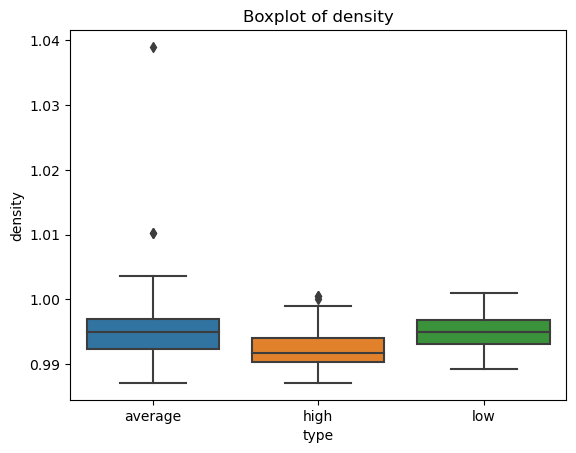

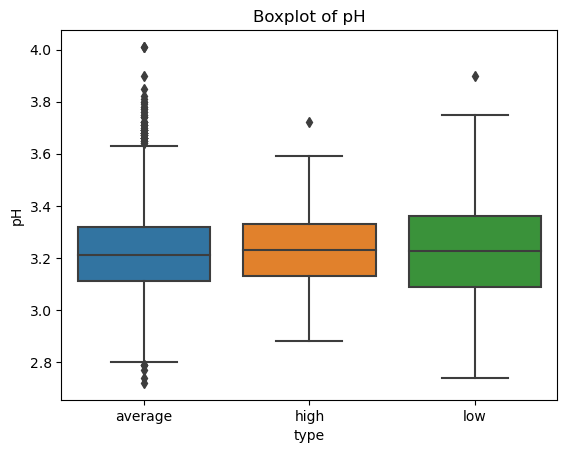

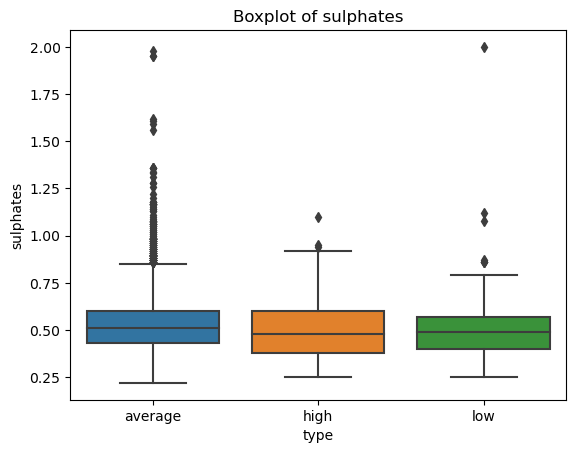

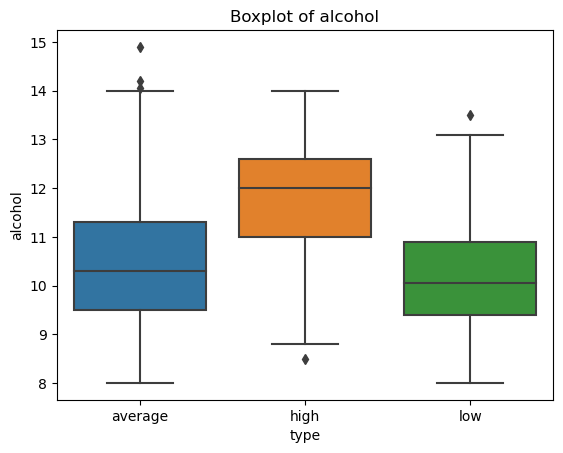

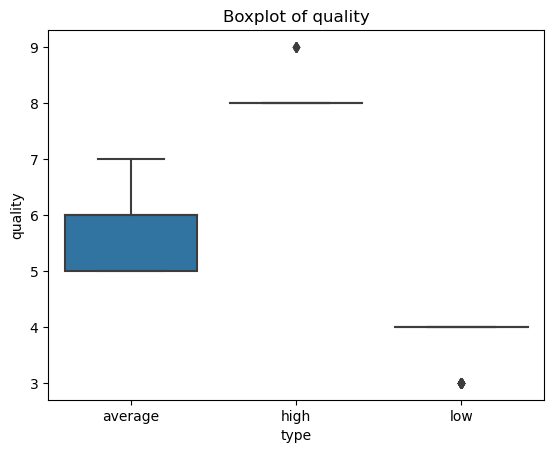

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [31]:
for col in df:
    sns.boxplot(data=df, x='type', y= col)
    plt.title(f'Boxplot of {col}')
    plt.show()

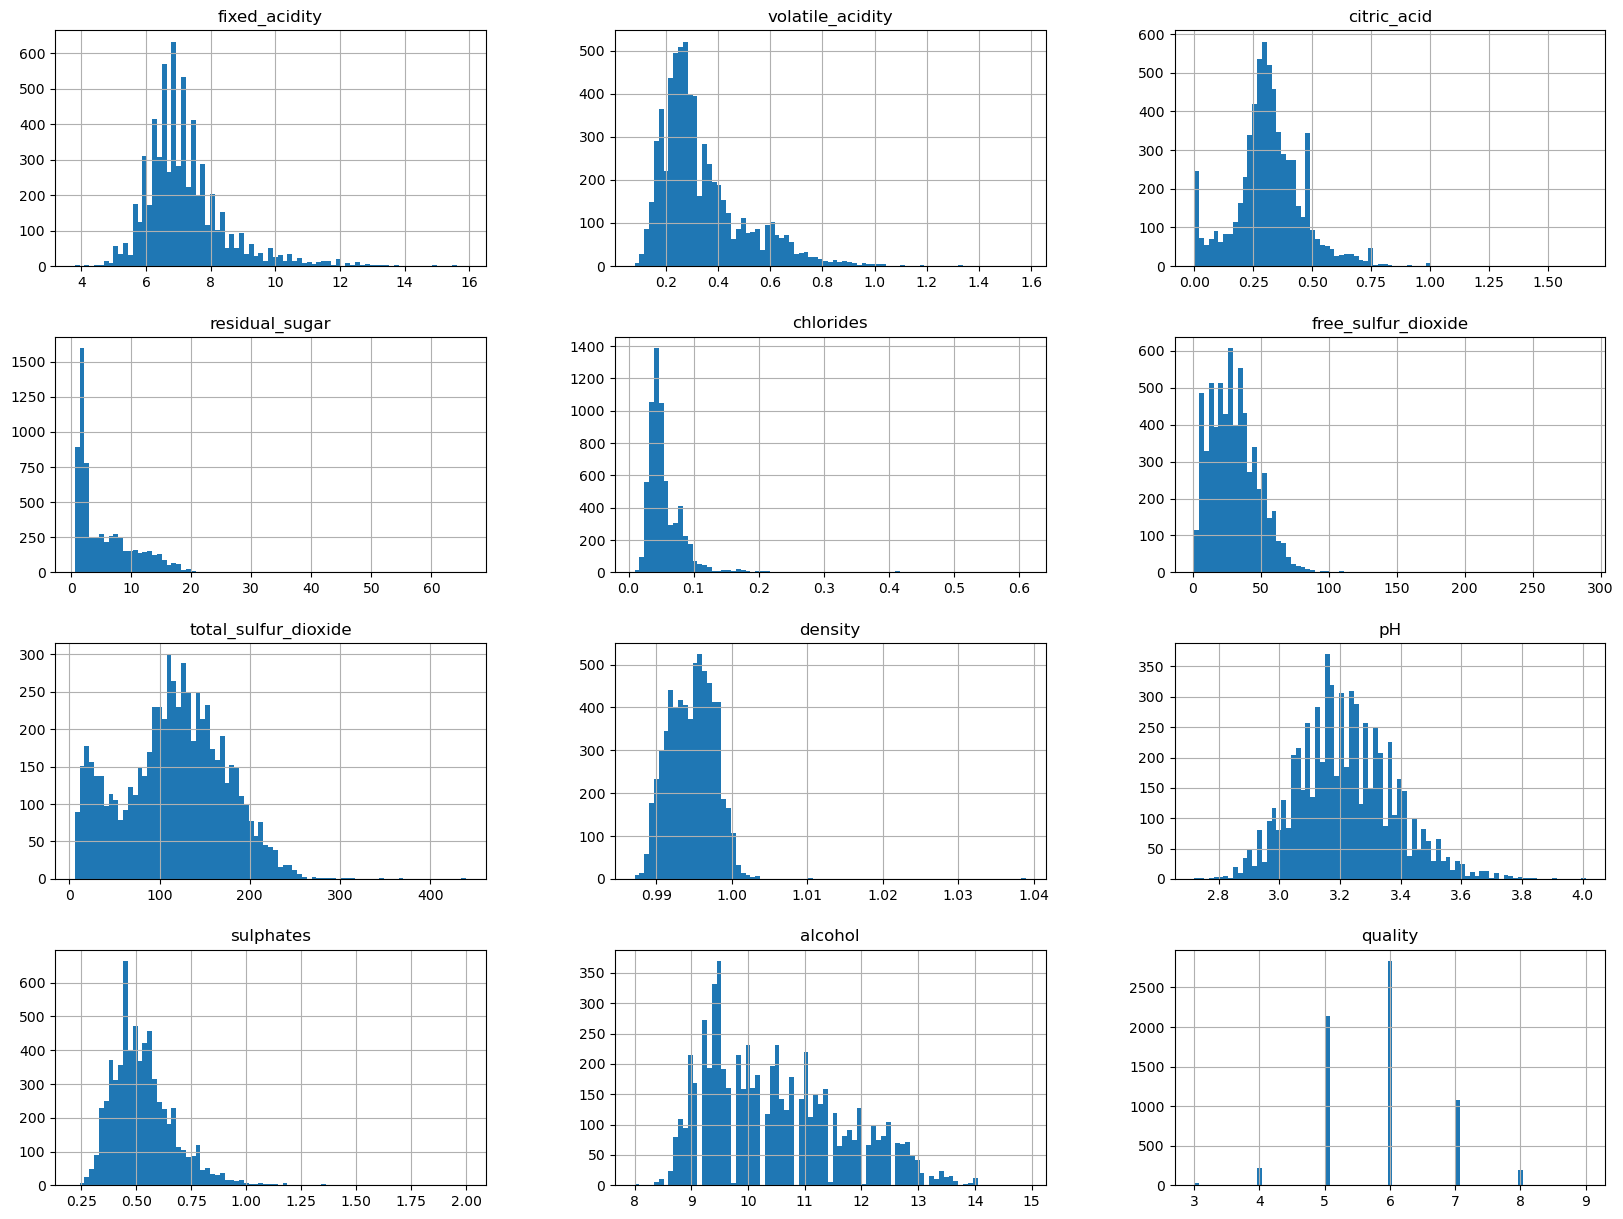

In [32]:
# did a histo plot on all columns in the train dataset

df.hist(bins=81, figsize=(20,15))
plt.show()

In [33]:
# Split before bivariate exploring
# Switched to random state 123 to match Zac's
def split_data(df):
    '''
    split continuouse data into train, validate, test; No target variable
    returns: train, validate, test
    '''

    train_val, test = train_test_split(df,
                                   train_size=0.8,
                                   random_state=123,
                                   )
    train, validate = train_test_split(train_val,
                                   train_size=0.75,
                                   random_state=123,
                                   )
    
    print(f'Train: {len(train)/len(df)}')
    print(f'Validate: {len(validate)/len(df)}')
    print(f'Test: {len(test)/len(df)}')
    

    return train, validate, test


In [34]:
train, validate, test = split_data(df)

Train: 0.5998152993689395
Validate: 0.20009235031553024
Test: 0.20009235031553024


In [35]:
train.shape

(3897, 14)

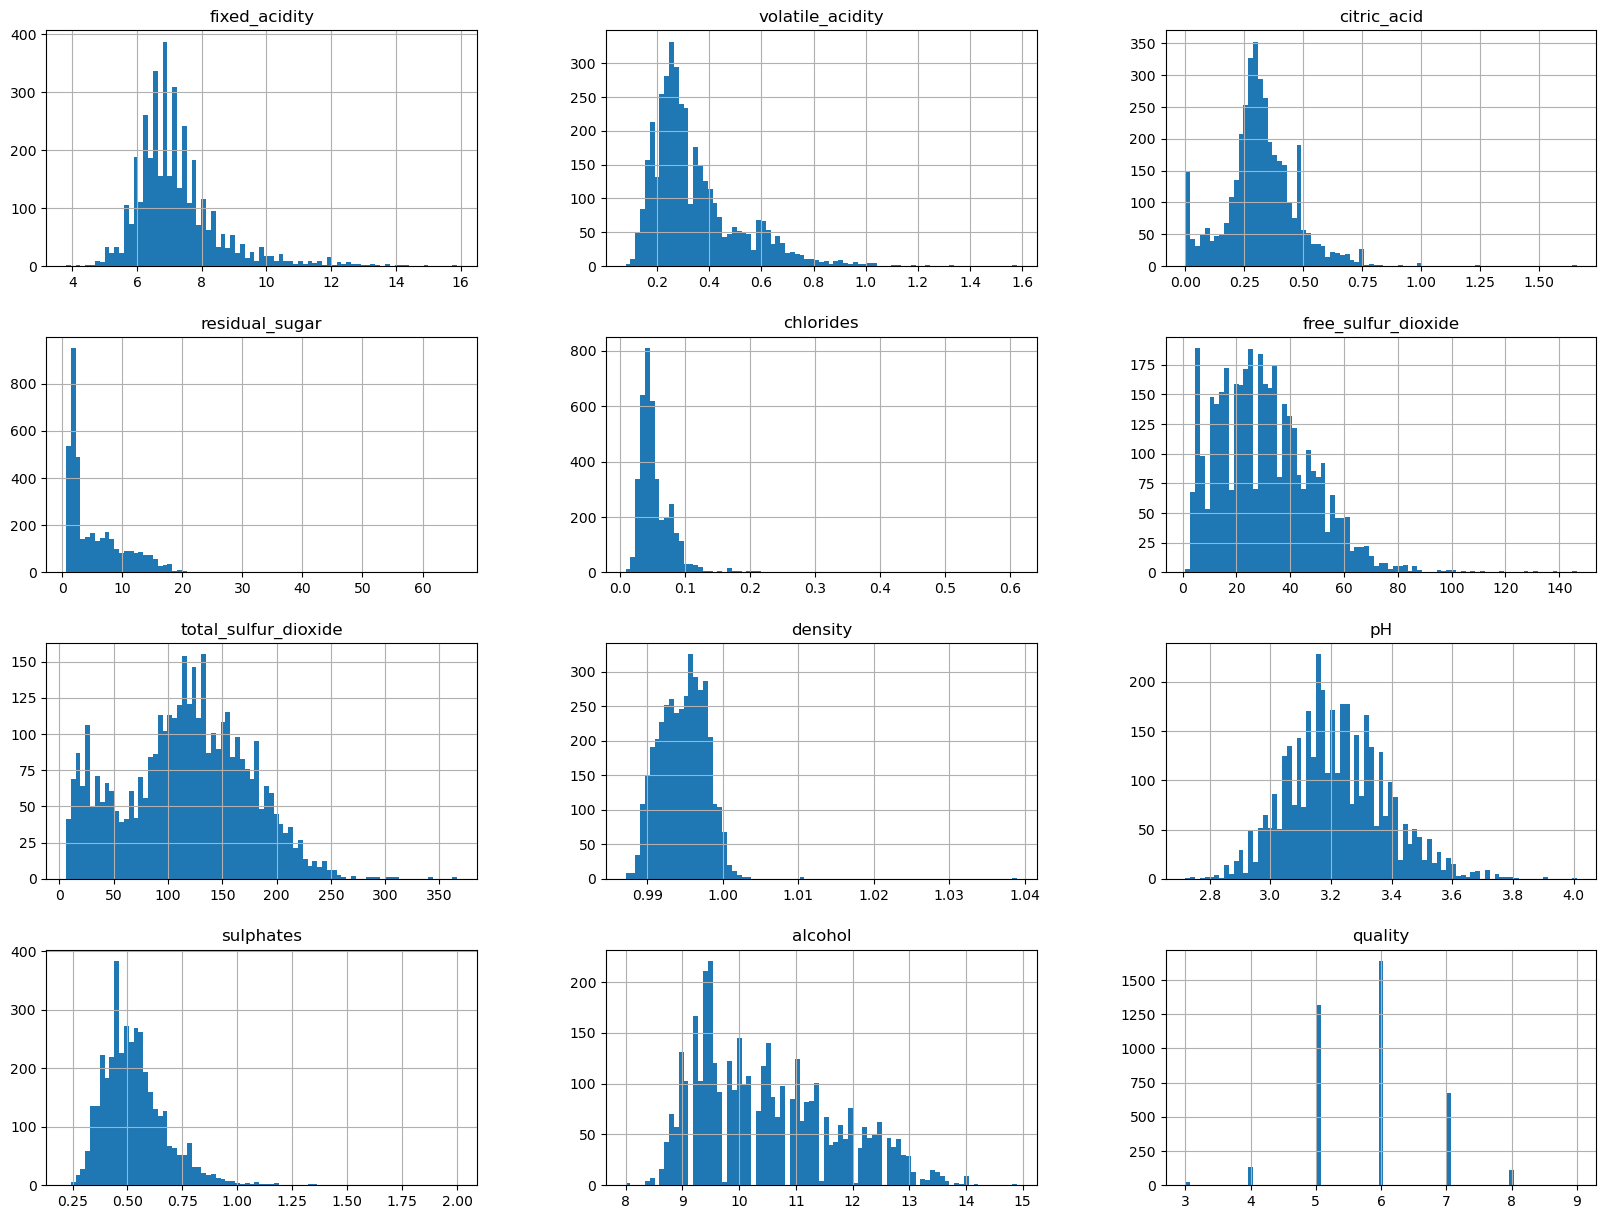

In [36]:
train.hist(bins=81, figsize=(20,15))
plt.show()

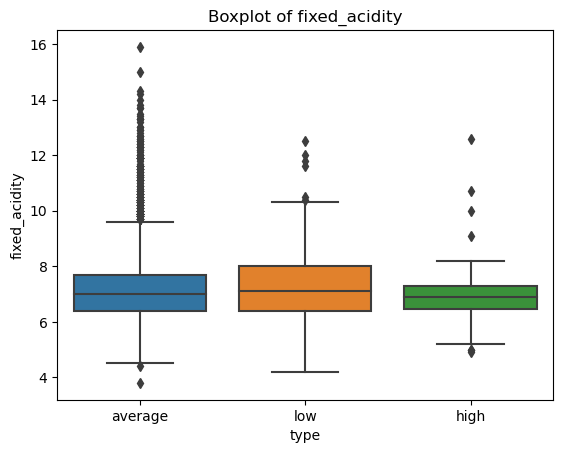

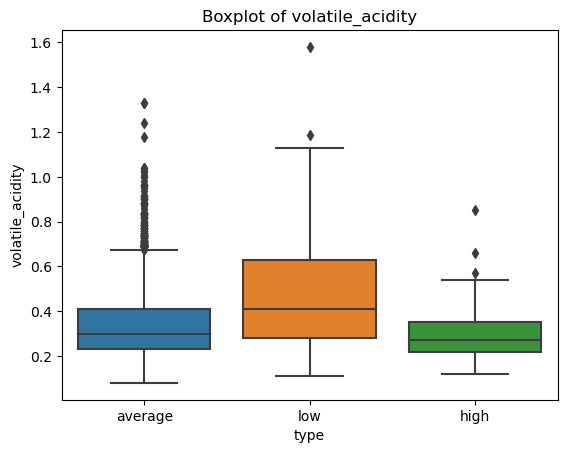

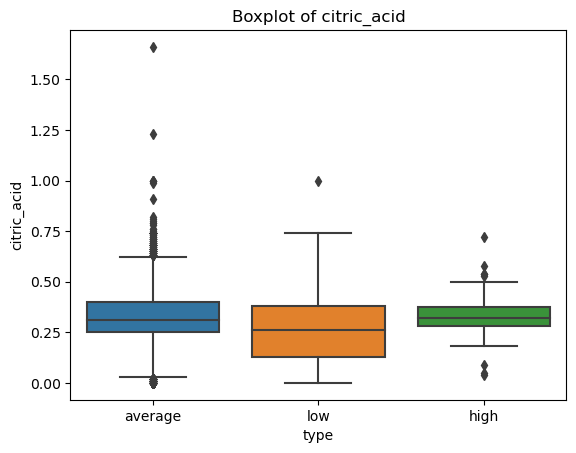

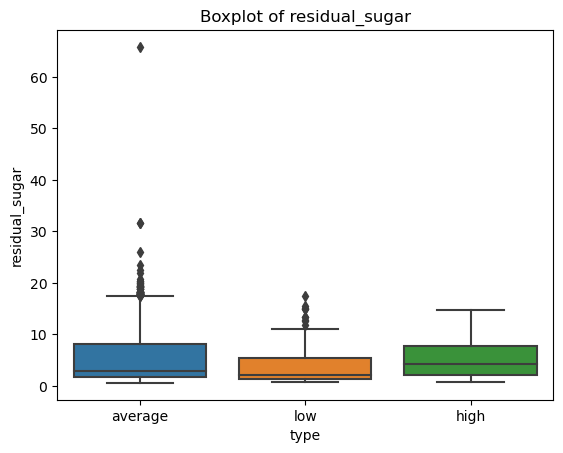

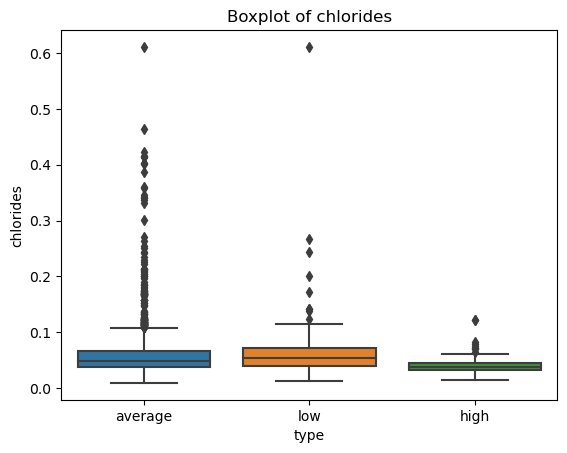

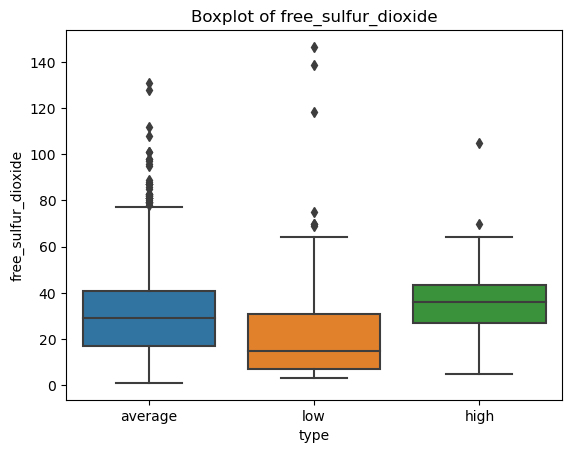

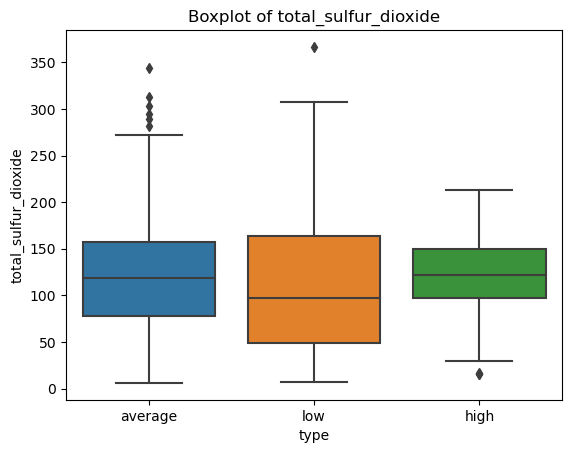

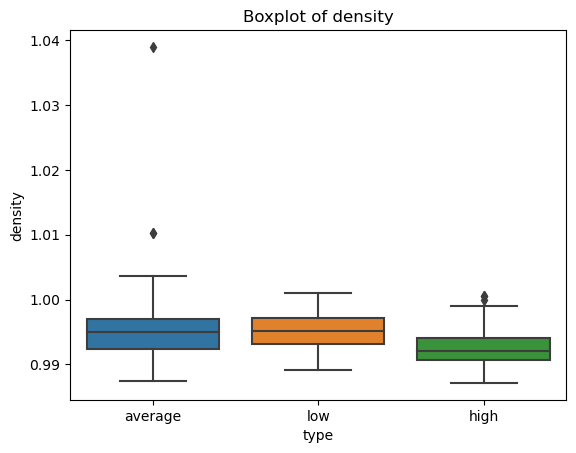

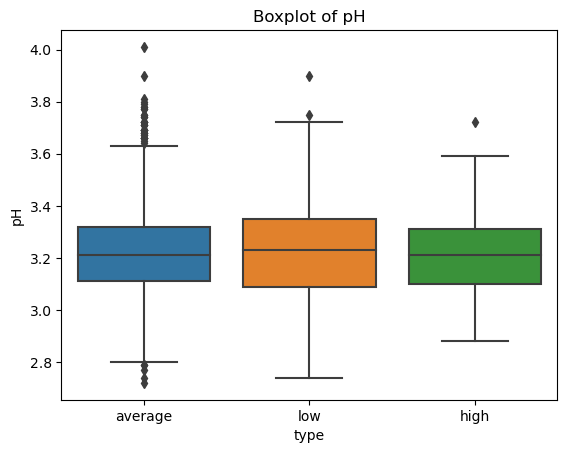

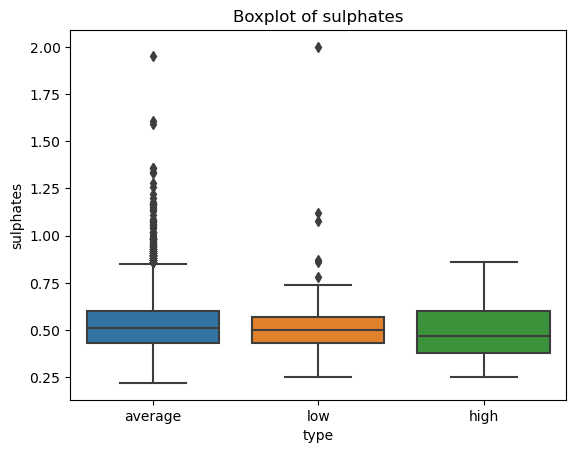

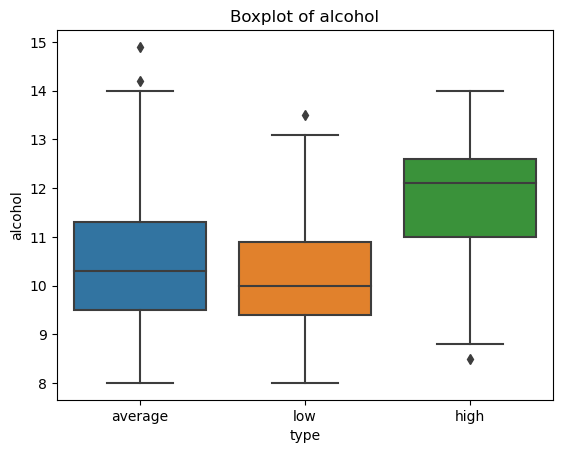

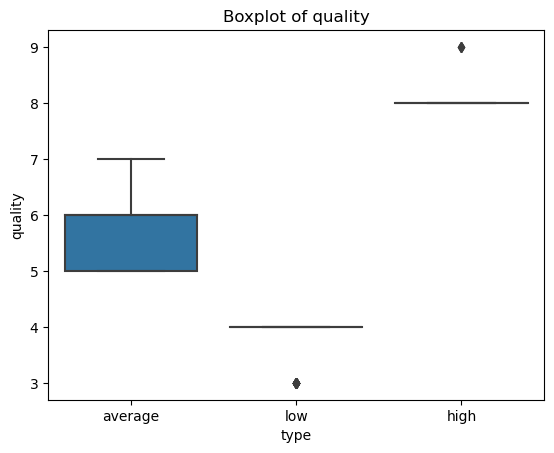

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [37]:
for col in train:
    sns.boxplot(data=train, x='type', y= col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [38]:
check_columns(train)

Total rows: 3897
Total columns: 14


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,fixed_acidity,float64,103,0,0.00,"[6.5, 6.7, 6.9, 6.4, 7.2, 6.6, 9.1, 5.8, 6.1, ...","[3.8, 15.9, 7.224159609956376]"
1,volatile_acidity,float64,173,0,0.00,"[0.43, 0.25, 0.46, 0.19, 0.39, 0.29, 0.2, 0.41...","[0.08, 1.58, 0.3460816012317167]"
2,citric_acid,float64,87,0,0.00,"[0.28, 0.2, 0.24, 0.39, 0.22, 0.3, 0.61, 0.27,...","[0.0, 1.66, 0.31882217090069287]"
3,residual_sugar,float64,285,0,0.00,"[11.25, 1.4, 1.7, 1.0, 4.3, 6.5, 16.2, 10.7, 8...","[0.6, 65.8, 5.385591480626123]"
4,chlorides,float64,186,0,0.00,"[0.032, 0.024, 0.077, 0.03, 0.209, 0.043, 0.11...","[0.009, 0.611, 0.05643161406209906]"
5,free_sulfur_dioxide,float64,124,0,0.00,"[31.0, 29.0, 18.0, 14.0, 10.0, 62.0, 20.0, 44....","[1.0, 146.5, 30.537079804978188]"
6,total_sulfur_dioxide,float64,268,0,0.00,"[87.0, 101.0, 34.0, 71.0, 102.0, 156.0, 103.0,...","[6.0, 366.5, 116.32807287657172]"
7,density,float64,874,0,0.00,"[0.9922, 0.9916, 0.9948, 0.98912, 0.993, 0.994...","[0.98713, 1.03898, 0.9947159840903259]"
8,pH,float64,103,0,0.00,"[3.02, 3.24, 3.39, 3.31, 3.0, 3.1, 3.06, 3.08,...","[2.72, 4.01, 3.220284834488068]"
9,sulphates,float64,104,0,0.00,"[0.38, 0.54, 0.6, 0.87, 0.4, 0.36, 0.41, 0.57,...","[0.22, 2.0, 0.532604567616115]"


__What does total_sulfer_dioxide and volitile acidity look like plotted?__

<Axes: xlabel='total_sulfur_dioxide', ylabel='volatile_acidity'>

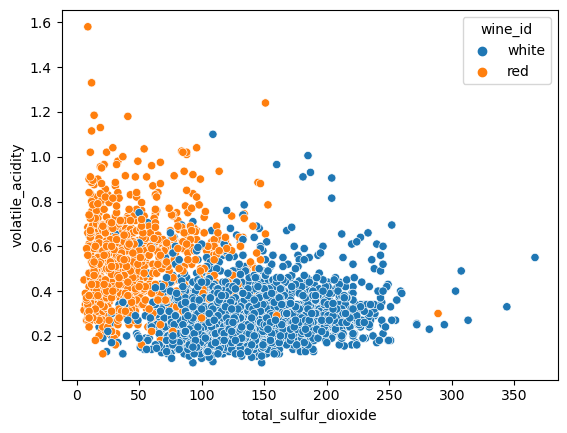

In [39]:
sns.scatterplot(train, x='total_sulfur_dioxide',y='volatile_acidity', hue= 'wine_id')

__What about fixed_acidity and sulphates__

<Axes: xlabel='fixed_acidity', ylabel='sulphates'>

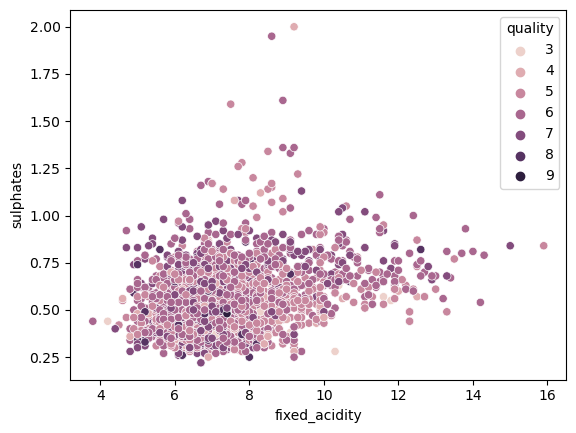

In [41]:
sns.scatterplot(train, x='fixed_acidity', y='sulphates', hue='quality')